In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['Target'] = y
df['Species'] = df['Target'].map(dict(enumerate(iris.target_names)))

print("Original Dataset Shape:", df.shape)

Original Dataset Shape: (150, 6)


In [ ]:
print(df['Species'].value_counts())
print(df.head())


Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target Species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [3]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nReduced Dataset Shape:", X_pca.shape)


Reduced Dataset Shape: (150, 2)


In [20]:
pca_df = pd.DataFrame(
    X_pca,
    columns=['Principal Component 1', 'Principal Component 2']
)

pca_df['Species'] = df['Species']

print("\nDataset After Dimensionality Reduction (First 5 Rows):")
print(pca_df.head())


Dataset After Dimensionality Reduction (First 5 Rows):
   Principal Component 1  Principal Component 2 Species
0              -2.264703               0.480027  setosa
1              -2.080961              -0.674134  setosa
2              -2.364229              -0.341908  setosa
3              -2.299384              -0.597395  setosa
4              -2.389842               0.646835  setosa


In [21]:
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

print("\nTotal Variance Explained:",
      sum(pca.explained_variance_ratio_))



Explained Variance Ratio:
[0.72962445 0.22850762]

Total Variance Explained: 0.9581320720000164


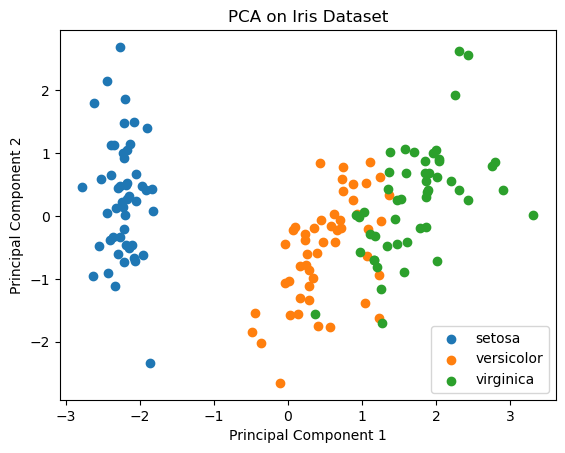

In [ ]:
plt.figure()

for species in pca_df['Species'].unique():
    plt.scatter(
        pca_df[pca_df['Species'] == species]['Principal Component 1'],
        pca_df[pca_df['Species'] == species]['Principal Component 2'],
        label=species  
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')

plt.legend()  
plt.show()